<a href="https://colab.research.google.com/github/elizabethyoo/team_9/blob/explore%2F02-eda-sbps/SBPS_surveylevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/DS4A/Group 9 Project Documents'

Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,10
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
combo_df = pd.read_csv('/content/drive/MyDrive/DS4A/Group 9 Project Documents/Datasets/business_pulse/combined_state_sector.csv')

In [ ]:
combo_df.head()

,ST,NAICS_SECTOR,INSTRUMENT_ID,QUESTION,ANSWER_ID,ANSWER_TEXT,ESTIMATE_PERCENTAGE,SE,DATE_START,DATE_END
0,-,-,1,"Overall, how has this business been affected b...",1,Large negative effect,51.4,0.21,2020-04-26,2020-05-02
1,-,-,1,"Overall, how has this business been affected b...",2,Moderate negative effect,38.5,0.27,2020-04-26,2020-05-02
2,-,-,1,"Overall, how has this business been affected b...",3,Little or no effect,7.6,0.29,2020-04-26,2020-05-02
3,-,-,1,"Overall, how has this business been affected b...",4,Moderate positive effect,1.7,0.08,2020-04-26,2020-05-02
4,-,-,1,"Overall, how has this business been affected b...",5,Large positive effect,0.8,0.06,2020-04-26,2020-05-02


In [ ]:
combo_df.tail()

,ST,NAICS_SECTOR,INSTRUMENT_ID,QUESTION,ANSWER_ID,ANSWER_TEXT,ESTIMATE_PERCENTAGE,SE,DATE_START,DATE_END
911067,WY,-,7,"In the last week, did this business have a cha...",3,No change,76.5,3.93,2021-09-27,2021-10-03
911068,WY,-,8,"In the last week, did this business require em...",2,No,78.0,7.00,2021-09-27,2021-10-03
911069,WY,-,9,"In the last week, did this business require em...",2,No,75.5,8.02,2021-09-27,2021-10-03
911070,WY,62,13,Comparing now to what was normal before March ...,3,Little or no change in number of hours worked ...,100.0,0.00,2021-09-27,2021-10-03
911071,WY,62,5,"In the last week, did this business do any of ...",4,None of the above,100.0,0.00,2021-09-27,2021-10-03


In [ ]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911072 entries, 0 to 911071
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ST                   911072 non-null  object 
 1   NAICS_SECTOR         911072 non-null  object 
 2   INSTRUMENT_ID        911072 non-null  int64  
 3   QUESTION             911072 non-null  object 
 4   ANSWER_ID            911072 non-null  int64  
 5   ANSWER_TEXT          911072 non-null  object 
 6   ESTIMATE_PERCENTAGE  911072 non-null  float64
 7   SE                   911072 non-null  float64
 8   DATE_START           911072 non-null  object 
 9   DATE_END             911072 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 69.5+ MB


In [ ]:
Filter1 = (combo_df.ST != "-") & (combo_df.NAICS_SECTOR == '-')

In [ ]:
combo_df_state = combo_df[Filter1]
combo_df_state.tail()

,ST,NAICS_SECTOR,INSTRUMENT_ID,QUESTION,ANSWER_ID,ANSWER_TEXT,ESTIMATE_PERCENTAGE,SE,DATE_START,DATE_END
911065,WY,-,5,"In the last week, did this business do any of ...",4,None of the above,98.6,1.44,2021-09-27,2021-10-03
911066,WY,-,6,"In the last week, did this business have a cha...",3,No change,88.2,4.35,2021-09-27,2021-10-03
911067,WY,-,7,"In the last week, did this business have a cha...",3,No change,76.5,3.93,2021-09-27,2021-10-03
911068,WY,-,8,"In the last week, did this business require em...",2,No,78.0,7.00,2021-09-27,2021-10-03
911069,WY,-,9,"In the last week, did this business require em...",2,No,75.5,8.02,2021-09-27,2021-10-03


In [ ]:
combo_df_state

,ST,NAICS_SECTOR,INSTRUMENT_ID,QUESTION,ANSWER_ID,ANSWER_TEXT,ESTIMATE_PERCENTAGE,SE,DATE_START,DATE_END
1162,AK,-,1,"Overall, how has this business been affected b...",1,Large negative effect,45.4,5.28,2020-04-26,2020-05-02
1163,AK,-,1,"Overall, how has this business been affected b...",2,Moderate negative effect,44.0,5.06,2020-04-26,2020-05-02
1164,AK,-,10,How would you describe the current availabilit...,2,1-2 weeks of business operations,20.0,3.04,2020-04-26,2020-05-02
1165,AK,-,10,How would you describe the current availabilit...,3,3-4 weeks of business operations,11.9,2.41,2020-04-26,2020-05-02
1166,AK,-,10,How would you describe the current availabilit...,4,1-2 months of business operations,25.7,4.28,2020-04-26,2020-05-02
...,...,...,...,...,...,...,...,...,...,...
911065,WY,-,5,"In the last week, did this business do any of ...",4,None of the above,98.6,1.44,2021-09-27,2021-10-03
911066,WY,-,6,"In the last week, did this business have a cha...",3,No change,88.2,4.35,2021-09-27,2021-10-03
911067,WY,-,7,"In the last week, did this business have a cha...",3,No change,76.5,3.93,2021-09-27,2021-10-03
911068,WY,-,8,"In the last week, did this business require em...",2,No,78.0,7.00,2021-09-27,2021-10-03


In [ ]:
combo_df_state[combo_df_state.QUESTION == "Overall, how has this business been affected by the Coronavirus pandemic?"]

,ST,NAICS_SECTOR,INSTRUMENT_ID,QUESTION,ANSWER_ID,ANSWER_TEXT,ESTIMATE_PERCENTAGE,SE,DATE_START,DATE_END
123073,AK,-,2,"Overall, how has this business been affected b...",1,Large negative effect,36.5,6.61,2020-08-09,2020-08-15
123074,AK,-,2,"Overall, how has this business been affected b...",2,Moderate negative effect,47.8,4.21,2020-08-09,2020-08-15
123138,AL,-,2,"Overall, how has this business been affected b...",1,Large negative effect,26.9,6.65,2020-08-09,2020-08-15
123139,AL,-,2,"Overall, how has this business been affected b...",2,Moderate negative effect,44.5,5.66,2020-08-09,2020-08-15
123140,AL,-,2,"Overall, how has this business been affected b...",3,Little or no effect,19.7,2.41,2020-08-09,2020-08-15
...,...,...,...,...,...,...,...,...,...,...
910631,WI,-,2,"Overall, how has this business been affected b...",4,Moderate positive effect,10.2,2.43,2021-09-27,2021-10-03
911011,WV,-,2,"Overall, how has this business been affected b...",2,Moderate negative effect,46.7,10.24,2021-09-27,2021-10-03
911012,WV,-,2,"Overall, how has this business been affected b...",3,Little or no effect,34.6,8.76,2021-09-27,2021-10-03
911055,WY,-,2,"Overall, how has this business been affected b...",2,Moderate negative effect,33.4,8.77,2021-09-27,2021-10-03


In [ ]:
OverallFilter = combo_df_state.QUESTION == "Overall, how has this business been affected by the Coronavirus pandemic?"
Overall_state_df = combo_df_state[OverallFilter]

In [ ]:
Overall_state_df

,ST,NAICS_SECTOR,INSTRUMENT_ID,QUESTION,ANSWER_ID,ANSWER_TEXT,ESTIMATE_PERCENTAGE,SE,DATE_START,DATE_END
123073,AK,-,2,"Overall, how has this business been affected b...",1,Large negative effect,36.5,6.61,2020-08-09,2020-08-15
123074,AK,-,2,"Overall, how has this business been affected b...",2,Moderate negative effect,47.8,4.21,2020-08-09,2020-08-15
123138,AL,-,2,"Overall, how has this business been affected b...",1,Large negative effect,26.9,6.65,2020-08-09,2020-08-15
123139,AL,-,2,"Overall, how has this business been affected b...",2,Moderate negative effect,44.5,5.66,2020-08-09,2020-08-15
123140,AL,-,2,"Overall, how has this business been affected b...",3,Little or no effect,19.7,2.41,2020-08-09,2020-08-15
...,...,...,...,...,...,...,...,...,...,...
910631,WI,-,2,"Overall, how has this business been affected b...",4,Moderate positive effect,10.2,2.43,2021-09-27,2021-10-03
911011,WV,-,2,"Overall, how has this business been affected b...",2,Moderate negative effect,46.7,10.24,2021-09-27,2021-10-03
911012,WV,-,2,"Overall, how has this business been affected b...",3,Little or no effect,34.6,8.76,2021-09-27,2021-10-03
911055,WY,-,2,"Overall, how has this business been affected b...",2,Moderate negative effect,33.4,8.77,2021-09-27,2021-10-03


In [ ]:
Overall_state_df = Overall_state_df.groupby(['ANSWER_TEXT', 'DATE_START'], as_index=False).mean()

In [ ]:
Overall_state_df = Overall_state_df.drop(columns=['INSTRUMENT_ID', 'ANSWER_ID', 'SE'])
Overall_state_df

,ANSWER_TEXT,DATE_START,ESTIMATE_PERCENTAGE
0,Large negative effect,2020-08-09,32.350000
1,Large negative effect,2020-08-16,31.057692
2,Large negative effect,2020-08-23,30.446154
3,Large negative effect,2020-08-30,30.317308
4,Large negative effect,2020-09-06,28.326923
...,...,...,...
210,Moderate positive effect,2021-08-30,7.623077
211,Moderate positive effect,2021-09-06,7.446154
212,Moderate positive effect,2021-09-13,7.332500
213,Moderate positive effect,2021-09-20,7.434884


In [ ]:
Overall_state_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 214
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ANSWER_TEXT          215 non-null    object 
 1   DATE_START           215 non-null    object 
 2   ESTIMATE_PERCENTAGE  215 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.7+ KB


In [ ]:
Overall = Overall_state_df.pivot("ANSWER_TEXT", "DATE_START", "ESTIMATE_PERCENTAGE")
row_order = ['Large negative effect', 'Moderate negative effect', 'Little or no effect', 'Moderate positive effect', 'Large positive effect']
Overall = Overall.reindex(row_order, axis=0)
Overall

DATE_START,2020-08-09,2020-08-16,2020-08-23,2020-08-30,2020-09-06,2020-09-13,2020-09-20,2020-09-27,2020-10-04,2020-11-09,2020-11-16,2020-11-23,2020-11-30,2020-12-07,2020-12-14,2020-12-21,2020-12-28,2021-01-04,2021-02-15,2021-02-22,2021-03-01,2021-03-08,2021-03-15,2021-03-22,2021-03-29,2021-04-04,2021-04-12,2021-05-17,2021-05-24,2021-05-31,2021-06-07,2021-06-14,2021-06-21,2021-06-28,2021-07-05,2021-07-12,2021-08-16,2021-08-23,2021-08-30,2021-09-06,2021-09-13,2021-09-20,2021-09-27
ANSWER_TEXT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Large negative effect,32.350000,31.057692,30.446154,30.317308,28.326923,30.151923,28.846154,27.532692,28.355769,27.703846,27.851923,28.882692,28.825000,28.223077,28.871154,28.570588,28.492308,28.001923,27.278846,27.351923,26.440385,26.238462,25.571154,25.998077,24.684314,24.867308,25.154902,24.476471,24.282692,24.737255,24.431373,23.340385,22.562745,23.200000,22.950000,23.265385,23.798000,21.813462,21.792157,22.202000,21.184000,22.030769,21.116327
Moderate negative effect,44.438462,44.030769,44.034615,44.094231,44.905769,43.663462,44.380769,45.573077,44.621154,45.201923,45.171154,44.111538,45.457692,45.461538,44.903846,44.126923,44.082692,44.657692,44.323077,43.861538,42.982692,44.709615,44.136538,43.846154,43.225000,43.944231,42.553846,43.840385,42.267308,41.634615,42.105769,43.165385,43.025000,40.911538,42.792308,42.265385,43.407692,44.282692,43.475000,43.478846,44.161538,43.411538,43.659615
Little or no effect,17.664000,18.446154,19.056863,19.007843,19.615686,19.635294,20.086538,20.032692,20.107692,20.368000,20.021154,19.940385,19.173077,19.348077,19.415686,20.921569,20.415385,20.811538,20.901923,21.396154,22.571154,21.609615,22.215385,22.150000,23.875000,22.780769,23.898039,23.278431,24.532692,24.148077,24.869231,24.317308,25.765385,26.401923,25.001923,25.871154,24.419608,24.698077,26.015385,26.003846,25.811538,25.723077,26.330769
Moderate positive effect,5.074194,5.234375,5.376471,5.306061,5.661765,5.470000,5.361538,5.730000,5.465714,6.337500,5.794595,6.402778,5.669231,5.741463,5.534146,5.724138,5.893548,5.545000,6.220000,6.359459,6.841026,6.664103,6.851351,6.430000,6.882051,7.055814,7.194118,7.474286,7.428205,8.004878,7.357500,7.346341,7.476923,7.702632,7.723684,7.355263,7.674359,7.541026,7.623077,7.446154,7.332500,7.434884,7.330952
Large positive effect,1.662500,1.588889,1.722222,1.825000,2.036364,1.881818,1.768750,2.092308,2.133333,1.483333,1.757143,1.510000,1.738889,1.833333,1.806250,1.728571,1.927273,1.522222,1.983333,1.590000,1.946154,1.707143,2.060000,2.205556,2.156250,1.860000,2.488235,2.250000,2.186667,2.142857,2.520000,2.405882,2.412500,2.356250,2.142857,2.086667,2.440000,2.020000,2.468750,2.233333,2.146154,2.391667,2.185714


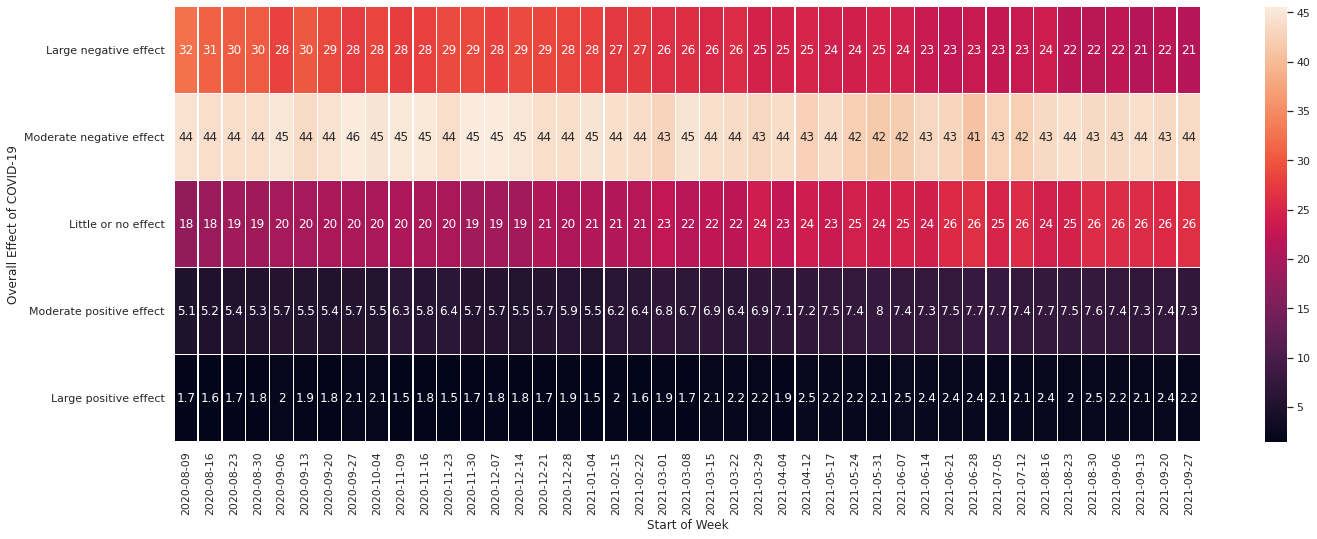

In [ ]:
# figure size in inches
sns.set(rc={'figure.figsize':(23,8)})
heatmap = sns.heatmap(Overall, annot=True, linewidths=.2)
plt.xlabel("Start of Week")
plt.ylabel("Overall Effect of COVID-19")
plt.show()